In [1]:
#[기본] 강의록 코드 
#[학습] 함수 및 패키지에 대한 한 줄 정리 및 주석
#[응용] 강의록 코드와 다르게 해결한 코드 또는 다른 dataset에 적용

### Denoising(저감)

<AxesSubplot: ylabel='Frequency'>

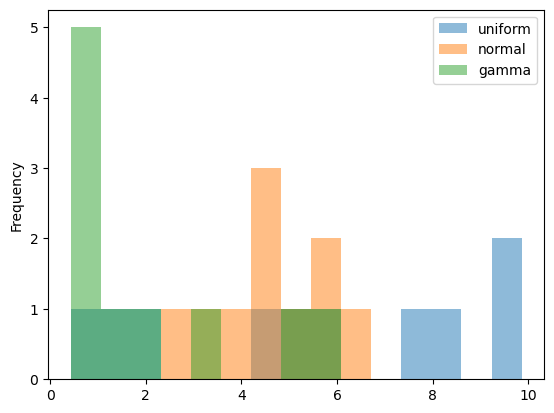

In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'uniform': np.sort(np.random.uniform(0,10,10)),
                   #균일분포에서 0이상 10이하인 난수 10개 생성
                     'normal': np.sort(np.random.normal(5,1,10)),
                   #정규분포에서 평균=5, 표준편차=1인 난수 10개 생성
                     'gamma': np.sort(np.random.gamma(2, size=10))})
                  #감마분포에서 모양=2인 난수 10개 생성

#데이터 분포 파악
df.plot(kind='hist', bins=15, alpha=0.5) # 0(=완전투명) ~ alpha ~ 1(=완전불투명)

In [3]:
# 데이터 기술통계량 요약
df.describe()

,uniform,normal,gamma
count,10.000000,10.000000,10.000000
mean,5.540343,4.626524,1.989192
std,3.347652,1.062542,1.978809
min,0.891437,2.778354,0.428568
25%,2.537949,4.084031,0.568272
50%,5.506699,4.656737,1.074623
75%,8.202485,5.343018,2.790843
max,9.859561,6.315587,5.911808


In [4]:
import copy
cols = ['uniform', 'normal', 'gamma']

# 동일간격-binning; cut; bins=[start, border, ..., end] 로 따로 지정도 가능!!
df_ed = copy.deepcopy(df)
for col in cols:
    df_ed[col+'_ed_bin'] = pd.cut(df_ed[col], 3)   # 동일간격-구간 3개
    mct = df_ed.groupby(col+'_ed_bin')[col].mean() # 구간별 평균값 계산
    df_ed[col+'_ed_DN'] = copy.deepcopy(df_ed[col+'_ed_bin'])
    df_ed.replace({col+'_ed_DN':mct},inplace=True) # 대표값(평균)으로 DeNoising

display(df_ed)

,uniform,normal,gamma,uniform_ed_bin,uniform_ed_DN,normal_ed_bin,normal_ed_DN,gamma_ed_bin,gamma_ed_DN
0,0.891437,2.778354,0.428568,"(0.882, 3.881]",1.423411,"(2.775, 3.957]",3.102114,"(0.423, 2.256]",0.857692
1,1.552603,3.425875,0.486107,"(0.882, 3.881]",1.423411,"(2.775, 3.957]",3.102114,"(0.423, 2.256]",0.857692
2,1.826193,3.979301,0.552185,"(0.882, 3.881]",1.423411,"(3.957, 5.137]",4.507580,"(0.423, 2.256]",0.857692
3,4.673219,4.398220,0.616531,"(3.881, 6.87]",5.228873,"(3.957, 5.137]",4.507580,"(0.423, 2.256]",0.857692
4,4.940906,4.632912,0.956284,"(3.881, 6.87]",5.228873,"(3.957, 5.137]",4.507580,"(0.423, 2.256]",0.857692
5,6.072492,4.680562,1.192963,"(3.881, 6.87]",5.228873,"(3.957, 5.137]",4.507580,"(0.423, 2.256]",0.857692
6,7.395881,4.846904,1.771203,"(6.87, 9.86]",8.861646,"(3.957, 5.137]",4.507580,"(0.423, 2.256]",0.857692
7,8.471354,5.508389,3.130723,"(6.87, 9.86]",8.861646,"(5.137, 6.316]",5.841039,"(2.256, 4.084]",3.130723
8,9.719788,5.699140,4.845547,"(6.87, 9.86]",8.861646,"(5.137, 6.316]",5.841039,"(4.084, 5.912]",5.378678
9,9.859561,6.315587,5.911808,"(6.87, 9.86]",8.861646,"(5.137, 6.316]",5.841039,"(4.084, 5.912]",5.378678


In [5]:
# 동일개수-binning; qcut
df_ef = copy.deepcopy(df)
for col in cols:
    df_ef[col+'_ef_bin'] = pd.qcut(df_ef[col], 3)   # 동일개수-구간 3개
    mct = df_ef.groupby(col+'_ef_bin')[col].mean() # 구간별 평균값 계산
    df_ef[col+'_ef_DN'] = copy.deepcopy(df_ef[col+'_ef_bin'])
    df_ef.replace({col+'_ef_DN': mct}, inplace=True) # 대표값(평균)으로 DeNoising

display(df_ef)

,uniform,normal,gamma,uniform_ef_bin,uniform_ef_DN,normal_ef_bin,normal_ef_DN,gamma_ef_bin,gamma_ef_DN
0,0.891437,2.778354,0.428568,"(0.89, 4.673]",2.235863,"(2.777, 4.398]",3.645437,"(0.428, 0.617]",0.520848
1,1.552603,3.425875,0.486107,"(0.89, 4.673]",2.235863,"(2.777, 4.398]",3.645437,"(0.428, 0.617]",0.520848
2,1.826193,3.979301,0.552185,"(0.89, 4.673]",2.235863,"(2.777, 4.398]",3.645437,"(0.428, 0.617]",0.520848
3,4.673219,4.398220,0.616531,"(0.89, 4.673]",2.235863,"(2.777, 4.398]",3.645437,"(0.428, 0.617]",0.520848
4,4.940906,4.632912,0.956284,"(4.673, 7.396]",6.136426,"(4.398, 4.847]",4.720126,"(0.617, 1.771]",1.306817
5,6.072492,4.680562,1.192963,"(4.673, 7.396]",6.136426,"(4.398, 4.847]",4.720126,"(0.617, 1.771]",1.306817
6,7.395881,4.846904,1.771203,"(4.673, 7.396]",6.136426,"(4.398, 4.847]",4.720126,"(0.617, 1.771]",1.306817
7,8.471354,5.508389,3.130723,"(7.396, 9.86]",9.350234,"(4.847, 6.316]",5.841039,"(1.771, 5.912]",4.629359
8,9.719788,5.699140,4.845547,"(7.396, 9.86]",9.350234,"(4.847, 6.316]",5.841039,"(1.771, 5.912]",4.629359
9,9.859561,6.315587,5.911808,"(7.396, 9.86]",9.350234,"(4.847, 6.316]",5.841039,"(1.771, 5.912]",4.629359


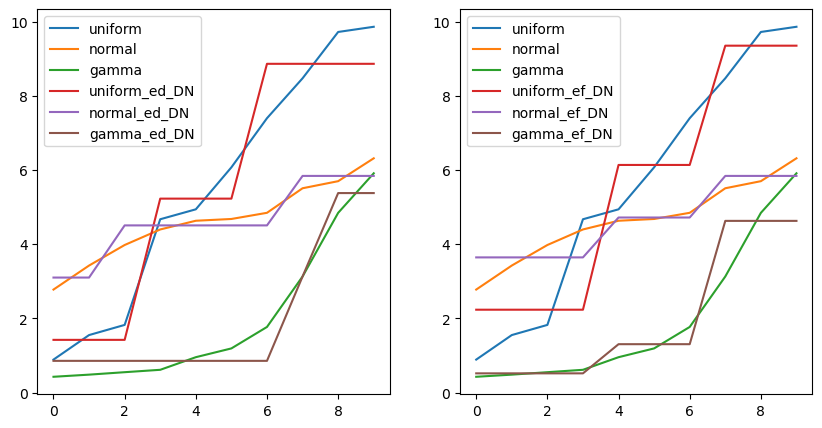

In [6]:
# Raw_data VS Denoised_data:시각화
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10,5))
pd.concat([df_ed.iloc[:,:3],df_ed.iloc[:,[4,6,8]]], axis=1).astype(float).plot(ax=axes[0])
pd.concat([df_ef.iloc[:,:3],df_ef.iloc[:,[4,6,8]]], axis=1).astype(float).plot(ax=axes[1])

plt.show()

In [7]:
cols

['uniform', 'normal', 'gamma']

In [8]:
df.columns

Index(['uniform', 'normal', 'gamma'], dtype='object')

In [9]:
import warnings
warnings.filterwarnings("ignore")

#KBinsDiscretizer의 Denoising
### sklearn의 결과: array !!
from sklearn.preprocessing import KBinsDiscretizer

# 동일간격-구간; strategy='uniform'
ed_bin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df_ed = ed_bin.fit_transform(df)

# 동일개수-구간; [default] strategy='quantile'
ef_bin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df_ef = ef_bin.fit_transform(df)

# (K-Means)군집화; strategy='kmeans'
km_bin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
df_km = km_bin.fit_transform(df)


df_ed = pd.DataFrame(df_ed, columns=df.columns+'_ed')
df_ef = pd.DataFrame(df_ef, columns=df.columns+'_ef')
df_km = pd.DataFrame(df_km, columns=df.columns+'_km')
df_bin = pd.concat([df, df_ed, df_ef, df_km], axis=1)
df_bin

,uniform,normal,gamma,uniform_ed,normal_ed,gamma_ed,uniform_ef,normal_ef,gamma_ef,uniform_km,normal_km,gamma_km
0,0.891437,2.778354,0.428568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.552603,3.425875,0.486107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.826193,3.979301,0.552185,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.673219,4.398220,0.616531,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
4,4.940906,4.632912,0.956284,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
5,6.072492,4.680562,1.192963,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
6,7.395881,4.846904,1.771203,2.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0
7,8.471354,5.508389,3.130723,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0
8,9.719788,5.699140,4.845547,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9,9.859561,6.315587,5.911808,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [10]:
# 구간화하여 평균값으로 대체하기
for bin_col in df_bin.columns:
    col = bin_col.split('_')[0] #'_'가 있는 column만 col에 저장될 것..
    means = df_bin.groupby(by=bin_col)[col].mean() # 구간별 평균값 계산
    df_bin.replace({bin_col: means}, inplace=True) # 평균값으로 대체

df_bin

,uniform,normal,gamma,uniform_ed,normal_ed,gamma_ed,uniform_ef,normal_ef,gamma_ef,uniform_km,normal_km,gamma_km
0,0.891437,2.778354,0.428568,1.423411,3.102114,0.857692,1.423411,3.394510,0.520848,1.423411,3.102114,0.857692
1,1.552603,3.425875,0.486107,1.423411,3.102114,0.857692,1.423411,3.394510,0.520848,1.423411,3.102114,0.857692
2,1.826193,3.979301,0.552185,1.423411,4.507580,0.857692,1.423411,3.394510,0.520848,1.423411,4.507580,0.857692
3,4.673219,4.398220,0.616531,5.228873,4.507580,0.857692,5.770625,4.639650,0.520848,5.228873,4.507580,0.857692
4,4.940906,4.632912,0.956284,5.228873,4.507580,0.857692,5.770625,4.639650,1.306817,5.228873,4.507580,0.857692
5,6.072492,4.680562,1.192963,5.228873,4.507580,0.857692,5.770625,4.639650,1.306817,5.228873,4.507580,0.857692
6,7.395881,4.846904,1.771203,8.861646,4.507580,0.857692,5.770625,4.639650,1.306817,8.861646,4.507580,0.857692
7,8.471354,5.508389,3.130723,8.861646,5.841039,3.130723,9.350234,5.841039,4.629359,8.861646,5.841039,3.130723
8,9.719788,5.699140,4.845547,8.861646,5.841039,5.378678,9.350234,5.841039,4.629359,8.861646,5.841039,5.378678
9,9.859561,6.315587,5.911808,8.861646,5.841039,5.378678,9.350234,5.841039,4.629359,8.861646,5.841039,5.378678


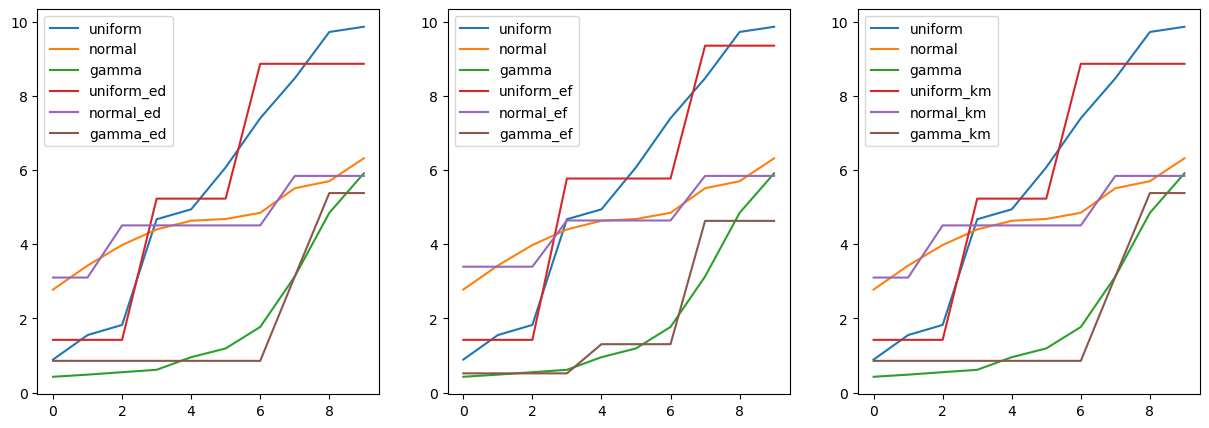

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15,5))
pd.concat([df_bin.iloc[:,:3], df_bin.iloc[:,3:6]], axis=1).astype(float).plot(ax=axes[0])
pd.concat([df_bin.iloc[:,:3], df_bin.iloc[:,6:9]], axis=1).astype(float).plot(ax=axes[1])
pd.concat([df_bin.iloc[:,:3], df_bin.iloc[:,9:]], axis=1).astype(float).plot(ax=axes[2])
plt.show()

# -------------------------------------------------

### Scaling
#### ; 독립변수들의 범위를 일정 수준화

In [12]:
import pandas as pd
import seaborn as sns

pd.set_option('display.float_format', lambda x: f'{x:.4f}')
tips = sns.load_dataset('tips')

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [13]:
# dtype= ['catergory', 'object'] 제외
tips = tips.select_dtypes(exclude='category')

# 기술통계량 요약
tips.describe()

,total_bill,tip,size
count,244.0000,244.0000,244.0000
mean,19.7859,2.9983,2.5697
std,8.9024,1.3836,0.9511
min,3.0700,1.0000,1.0000
25%,13.3475,2.0000,2.0000
50%,17.7950,2.9000,2.0000
75%,24.1275,3.5625,3.0000
max,50.8100,10.0000,6.0000


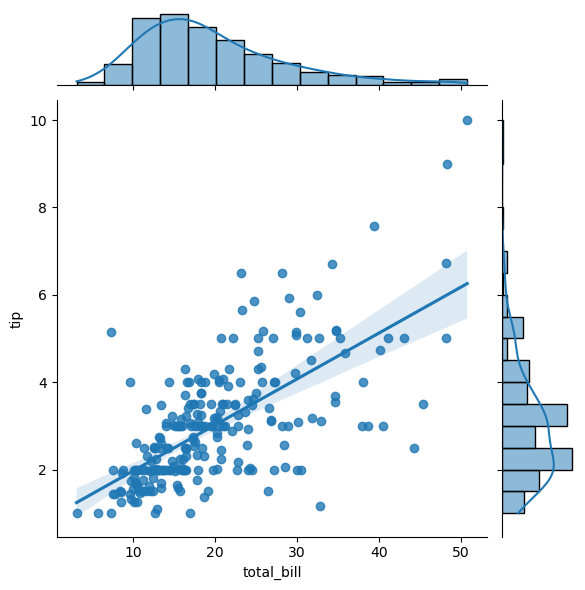

In [14]:
# jointplot(수치형 변수 간의 관계): kind='reg'(회귀선을 중심으로)
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')

#### 표준화; 정규분포

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Scaling; sklearn 후 자동으로 array형 이므로, DataFrame으로 변환해줘야!!
tips_standard = pd.DataFrame(standard_scaler.fit_transform(tips), columns=tips.columns)
tips_robust = pd.DataFrame(robust_scaler.fit_transform(tips), columns=tips.columns)

# 기술통계량으로 Scaling 결과 확인
print('Standard Scaled: \n', tips_standard.describe()) # mean = 0, std = 1
print()
print('Robust Scaled: \n', tips_robust.describe()) # Q2 = 0, Q3-Q1 = 1

Standard Scaled: 
        total_bill      tip     size
count    244.0000 244.0000 244.0000
mean      -0.0000   0.0000  -0.0000
std        1.0021   1.0021   1.0021
min       -1.8815  -1.4472  -1.6538
25%       -0.7247  -0.7230  -0.6002
50%       -0.2241  -0.0712  -0.6002
75%        0.4887   0.4086   0.4534
max        3.4921   5.0708   3.6141

Robust Scaled: 
        total_bill      tip     size
count    244.0000 244.0000 244.0000
mean       0.1847   0.0629   0.5697
std        0.8258   0.8855   0.9511
min       -1.3660  -1.2160  -1.0000
25%       -0.4126  -0.5760   0.0000
50%       -0.0000   0.0000   0.0000
75%        0.5874   0.4240   1.0000
max        3.0626   4.5440   4.0000


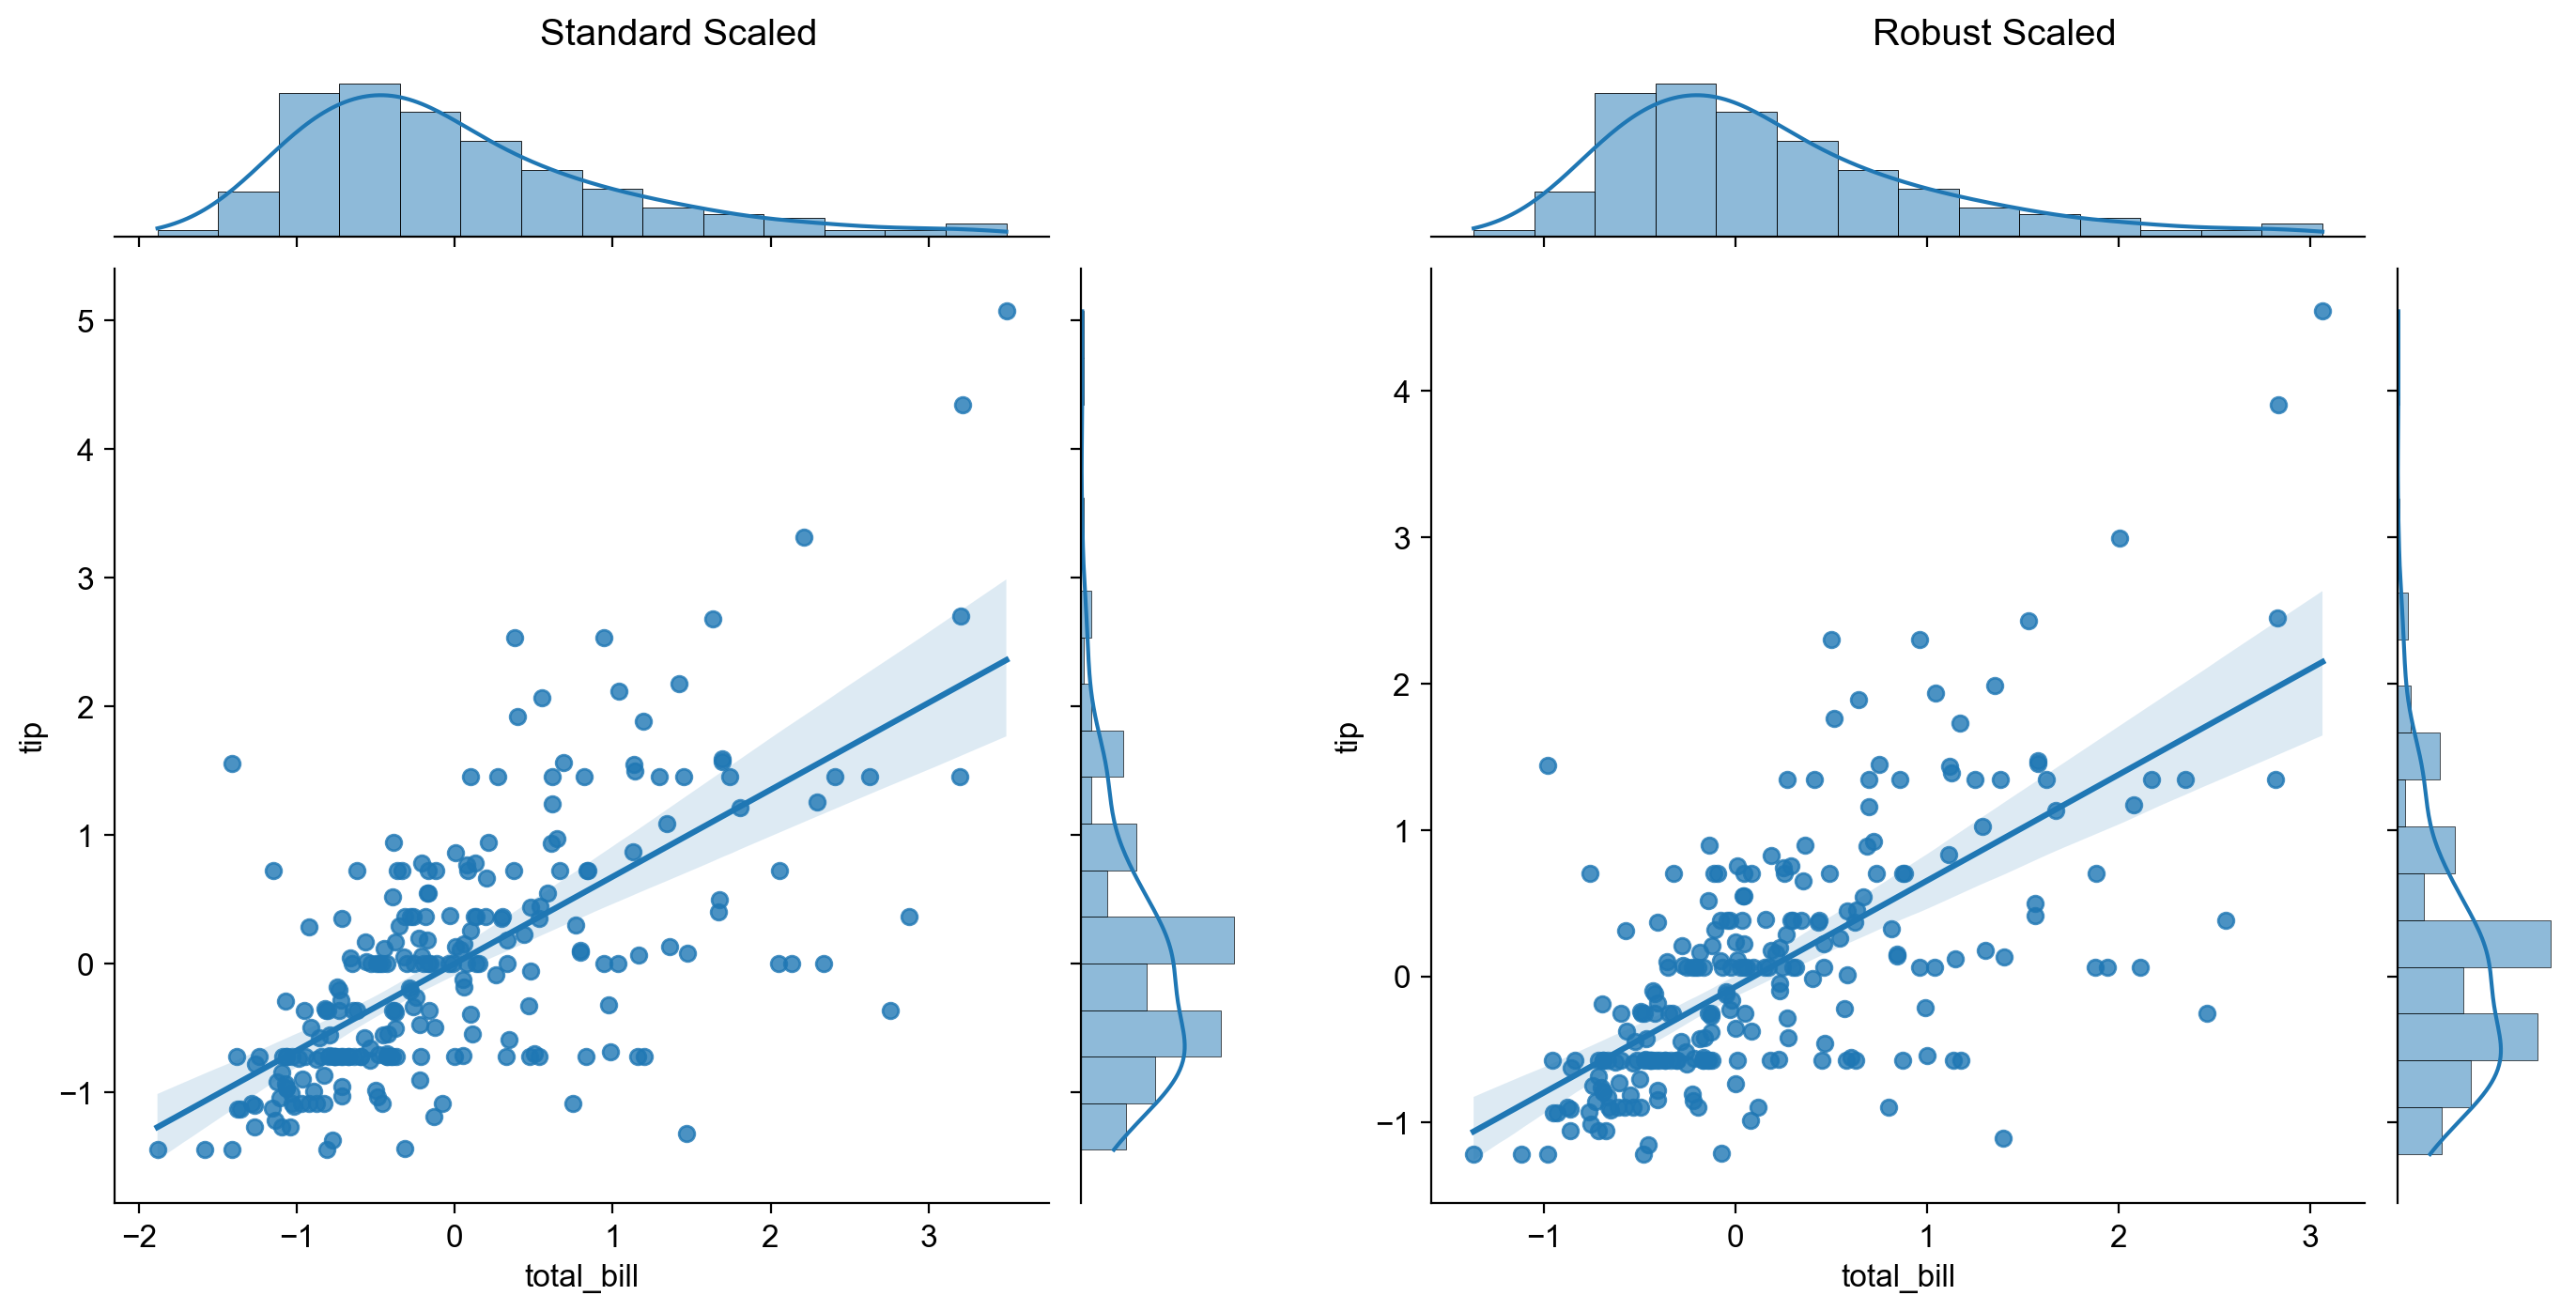

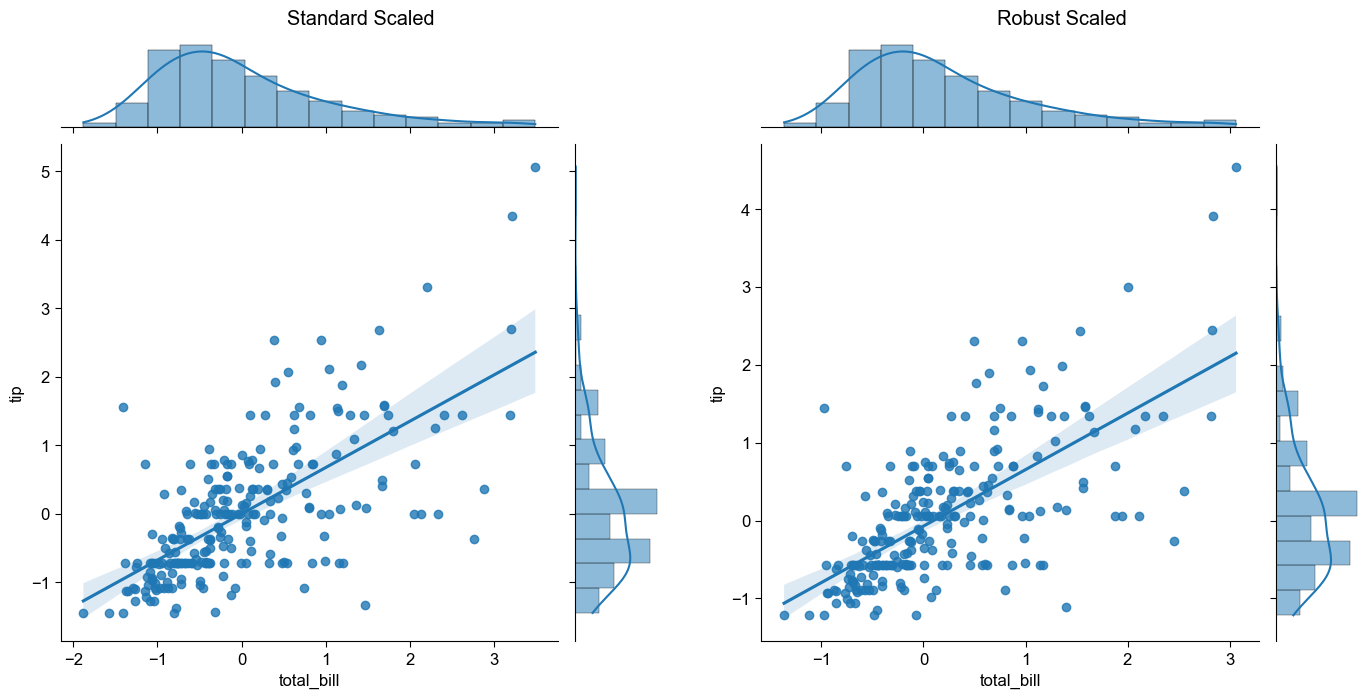

In [16]:
# 그래프로 확인; figure_axes을 지정할 수 있는 patchworklib 사용~
import patchworklib as pw
pw.overwrite_axisgrid()

# StandardScaler 
g1 = sns.jointplot(data=tips_standard, x='total_bill', y='tip', kind='reg')
g1 = pw.load_seaborngrid(g1)
g1.set_suptitle("Standard Scaled")

# RobustScaler
g2 = sns.jointplot(data=tips_robust, x='total_bill', y='tip', kind='reg')
g2 = pw.load_seaborngrid(g2)
g2.set_suptitle("Robust Scaled")

# 그래프 합치기
g0_s = (g1|g2)
g0_s

#### 정규화; min-max 획일화

In [17]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
minmax_scaler = MinMaxScaler()
maxabs_scaler = MaxAbsScaler()

# Scaling; sklearn 후 자동으로 array형 이므로, DataFrame으로 변환해줘야!!
tips_minmax = pd.DataFrame(minmax_scaler.fit_transform(tips), columns=tips.columns)
tips_maxabs = pd.DataFrame(maxabs_scaler.fit_transform(tips), columns=tips.columns)

# 기술통계량으로 Scaling 결과확인
print('MinMax Scaled: \n', tips_minmax.describe()) # min = 0, max = 1
print()
print('MaxAbs Scaled: \n', tips_maxabs.describe()) # min ≒ 0, max = 1

MinMax Scaled: 
        total_bill      tip     size
count    244.0000 244.0000 244.0000
mean       0.3501   0.2220   0.3139
std        0.1865   0.1537   0.1902
min        0.0000   0.0000   0.0000
25%        0.2153   0.1111   0.2000
50%        0.3084   0.2111   0.2000
75%        0.4411   0.2847   0.4000
max        1.0000   1.0000   1.0000

MaxAbs Scaled: 
        total_bill      tip     size
count    244.0000 244.0000 244.0000
mean       0.3894   0.2998   0.4283
std        0.1752   0.1384   0.1585
min        0.0604   0.1000   0.1667
25%        0.2627   0.2000   0.3333
50%        0.3502   0.2900   0.3333
75%        0.4749   0.3562   0.5000
max        1.0000   1.0000   1.0000


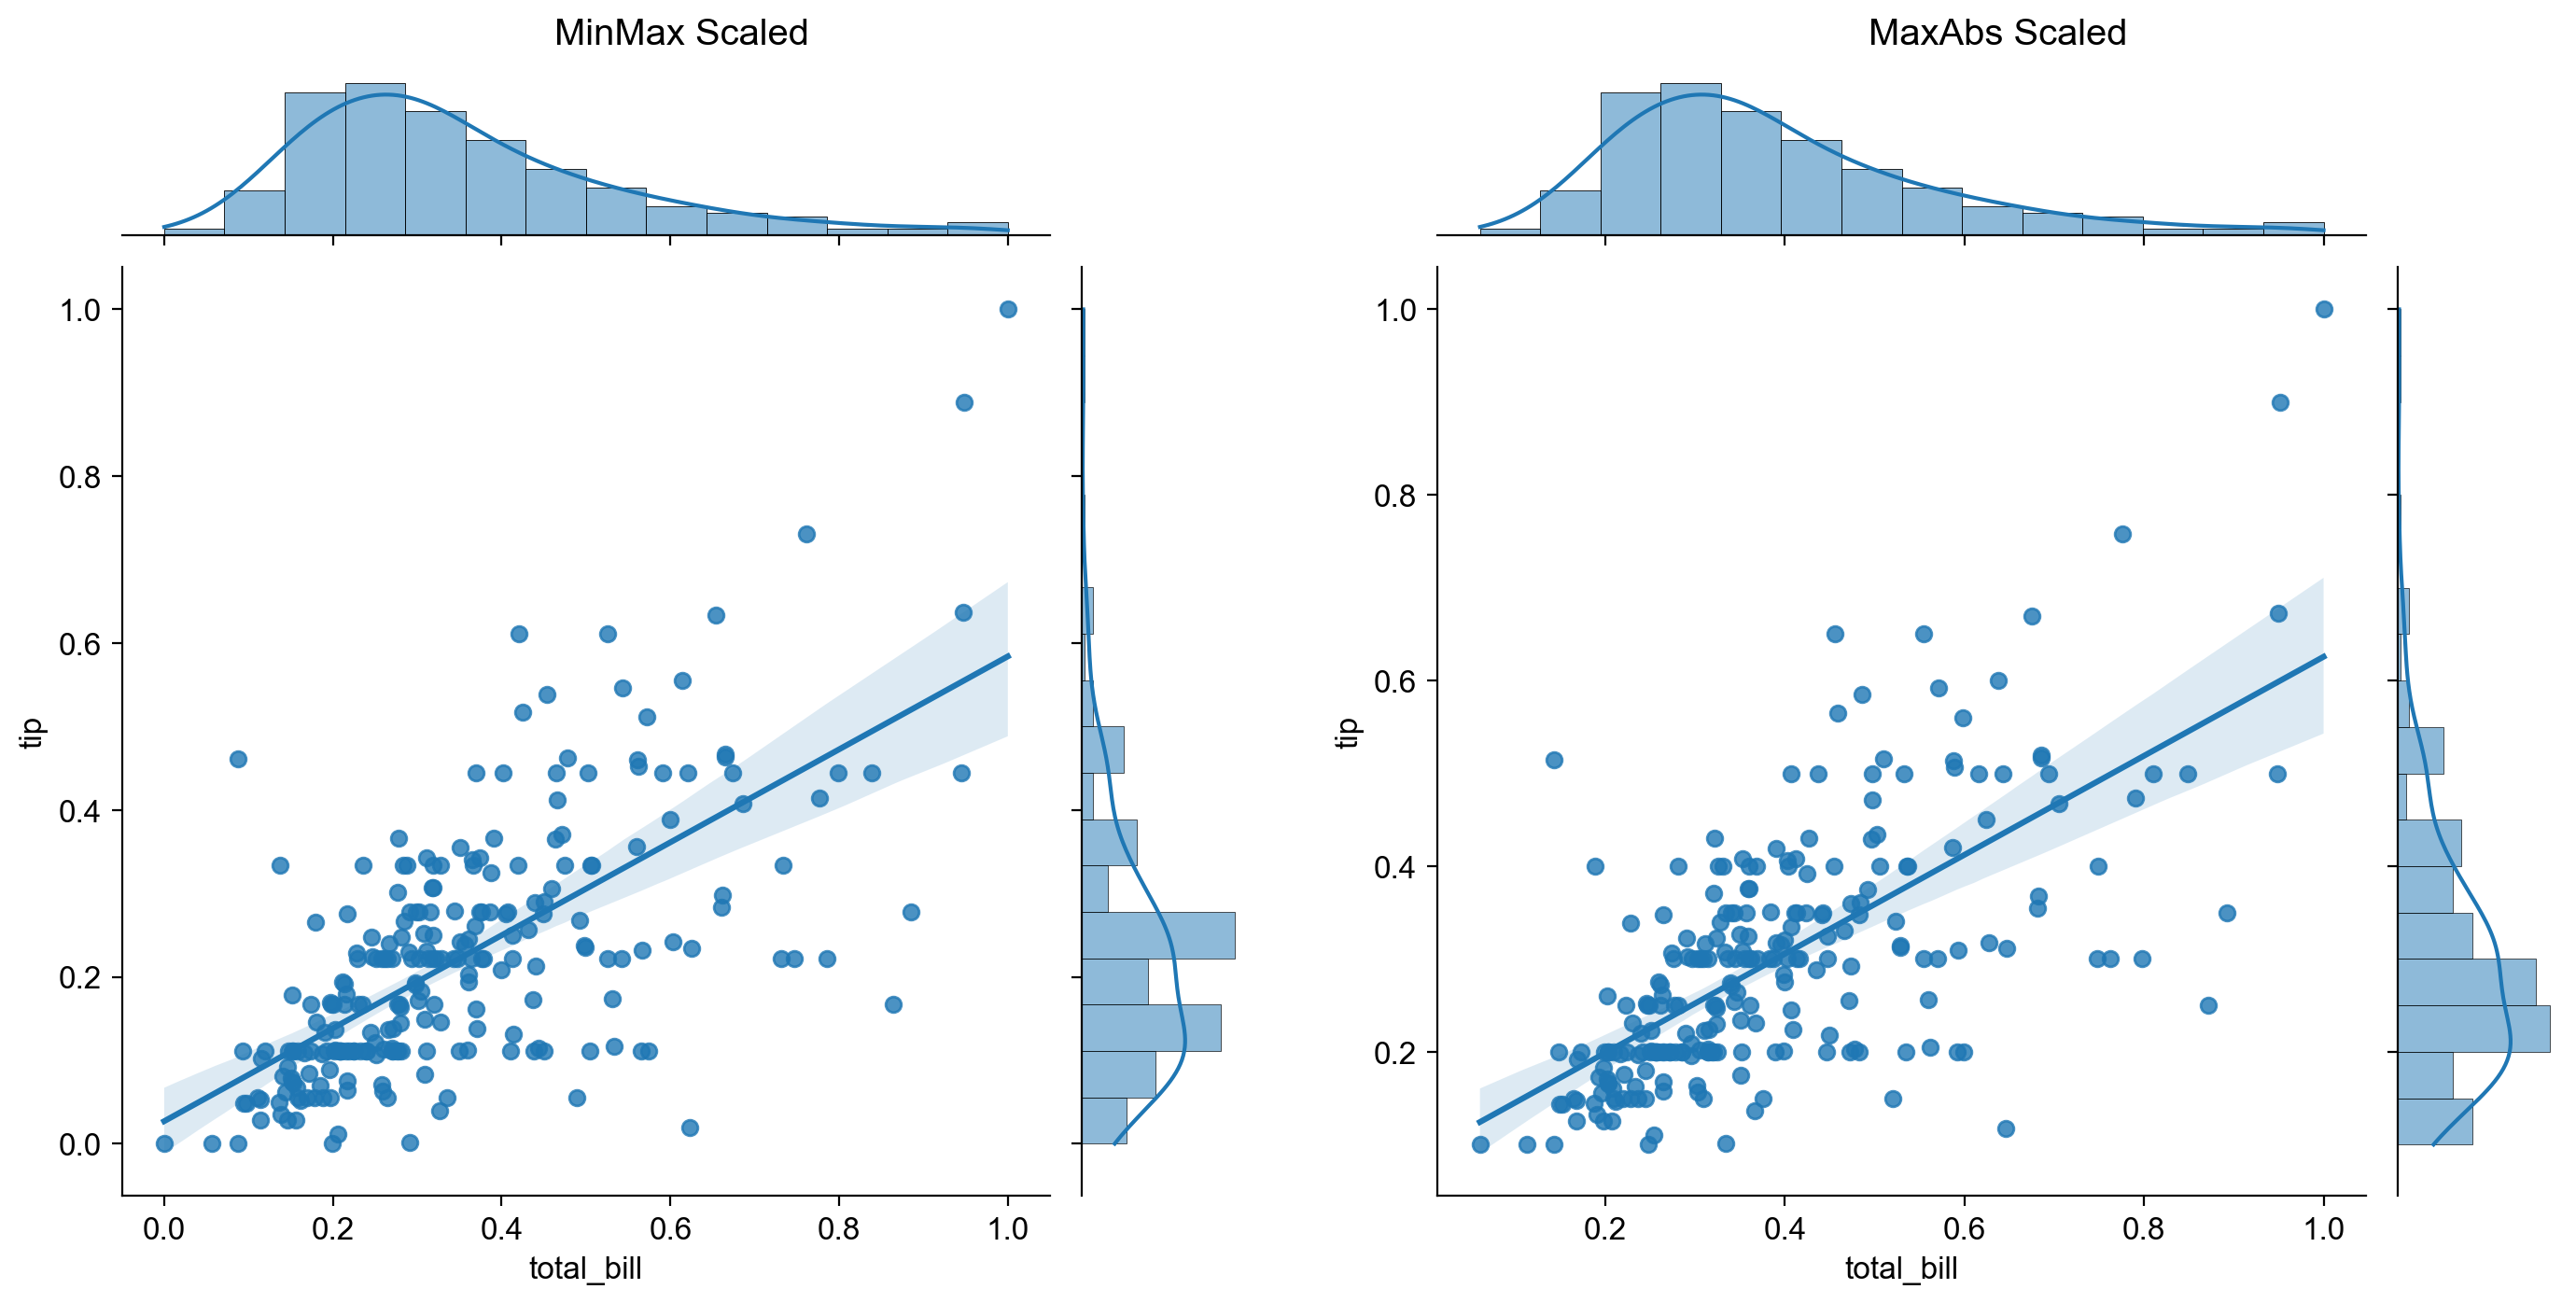

In [18]:
# 그래프로 확인; figure_axes을 지정할 수 있는 patchworklib 사용~
import patchworklib as pw
pw.overwrite_axisgrid()

# MinMaxScaler 
g3 = sns.jointplot(data=tips_minmax, x='total_bill', y='tip', kind='reg')
g3 = pw.load_seaborngrid(g3)
g3.set_suptitle("MinMax Scaled")

# MaxAbsScaler 
g4 = sns.jointplot(data=tips_maxabs, x='total_bill', y='tip', kind='reg')
g4 = pw.load_seaborngrid(g4)
g4.set_suptitle("MaxAbs Scaled")

# 그래프 합치기
g0_n = (g3|g4)
g0_n #양수만 있는 dataset에서 MinMaxScaler ↔ MaxAbsScaler 간의 차이는 크지 않음..

#### 변환

In [19]:
import numpy as np

from sklearn.preprocessing import PowerTransformer, Normalizer, QuantileTransformer
power_scaler = PowerTransformer()
normal_scaler = Normalizer()
gaussian_scaler = QuantileTransformer(output_distribution='normal')
uniform_scaler = QuantileTransformer(output_distribution='uniform')


# Scaling; sklearn 후 자동으로 array형 이므로, DataFrame으로 변환해줘야!!
tips_power = pd.DataFrame(power_scaler.fit_transform(tips), columns=tips.columns)
tips_normal = pd.DataFrame(normal_scaler.fit_transform(tips), columns=tips.columns)
tips_gaussian = pd.DataFrame(gaussian_scaler.fit_transform(tips), columns=tips.columns)
tips_uniform = pd.DataFrame(uniform_scaler.fit_transform(tips), columns=tips.columns)


# 기술통계량으로 Scaling 결과확인
print('PowerTransformer Scaled: \n', tips_power.describe())
# 정규성변환(≒표준화); mean = 0, std = 1
print()
print('Normalizer Scaled: \n', tips_normal.describe())
# 각 행(axis=1)의 벡터 크기 = 1; numpy.linalg.norm: 벡터크기
print('Euclidian Distance from 0: \n', np.linalg.norm(tips_normal, axis=1)) 
print('\n'*2)
print('QuantileTransformer_Gaussian Scaled: \n', tips_gaussian.describe())
#정규분포; mean=Q2 ≒ 0, std=1
print()
print('QuantileTransformer_Uniform Scaled: \n', tips_uniform.describe())
#균일분포; data와 무관하게 기술통계량 유지

PowerTransformer Scaled: 
        total_bill      tip     size
count    244.0000 244.0000 244.0000
mean      -0.0000   0.0000  -0.0000
std        1.0021   1.0021   1.0021
min       -3.7294  -2.2894  -3.6767
25%       -0.6945  -0.7201  -0.5610
50%       -0.0401   0.1566  -0.5610
75%        0.6653   0.6348   0.7681
max        2.4303   2.7853   2.1966

Normalizer Scaled: 
        total_bill      tip     size
count    244.0000 244.0000 244.0000
mean       0.9752   0.1559   0.1390
std        0.0170   0.0534   0.0464
min        0.7954   0.0355   0.0491
25%        0.9696   0.1265   0.1045
50%        0.9772   0.1519   0.1343
75%        0.9836   0.1851   0.1657
max        0.9975   0.5650   0.3242
Euclidian Distance from 0: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

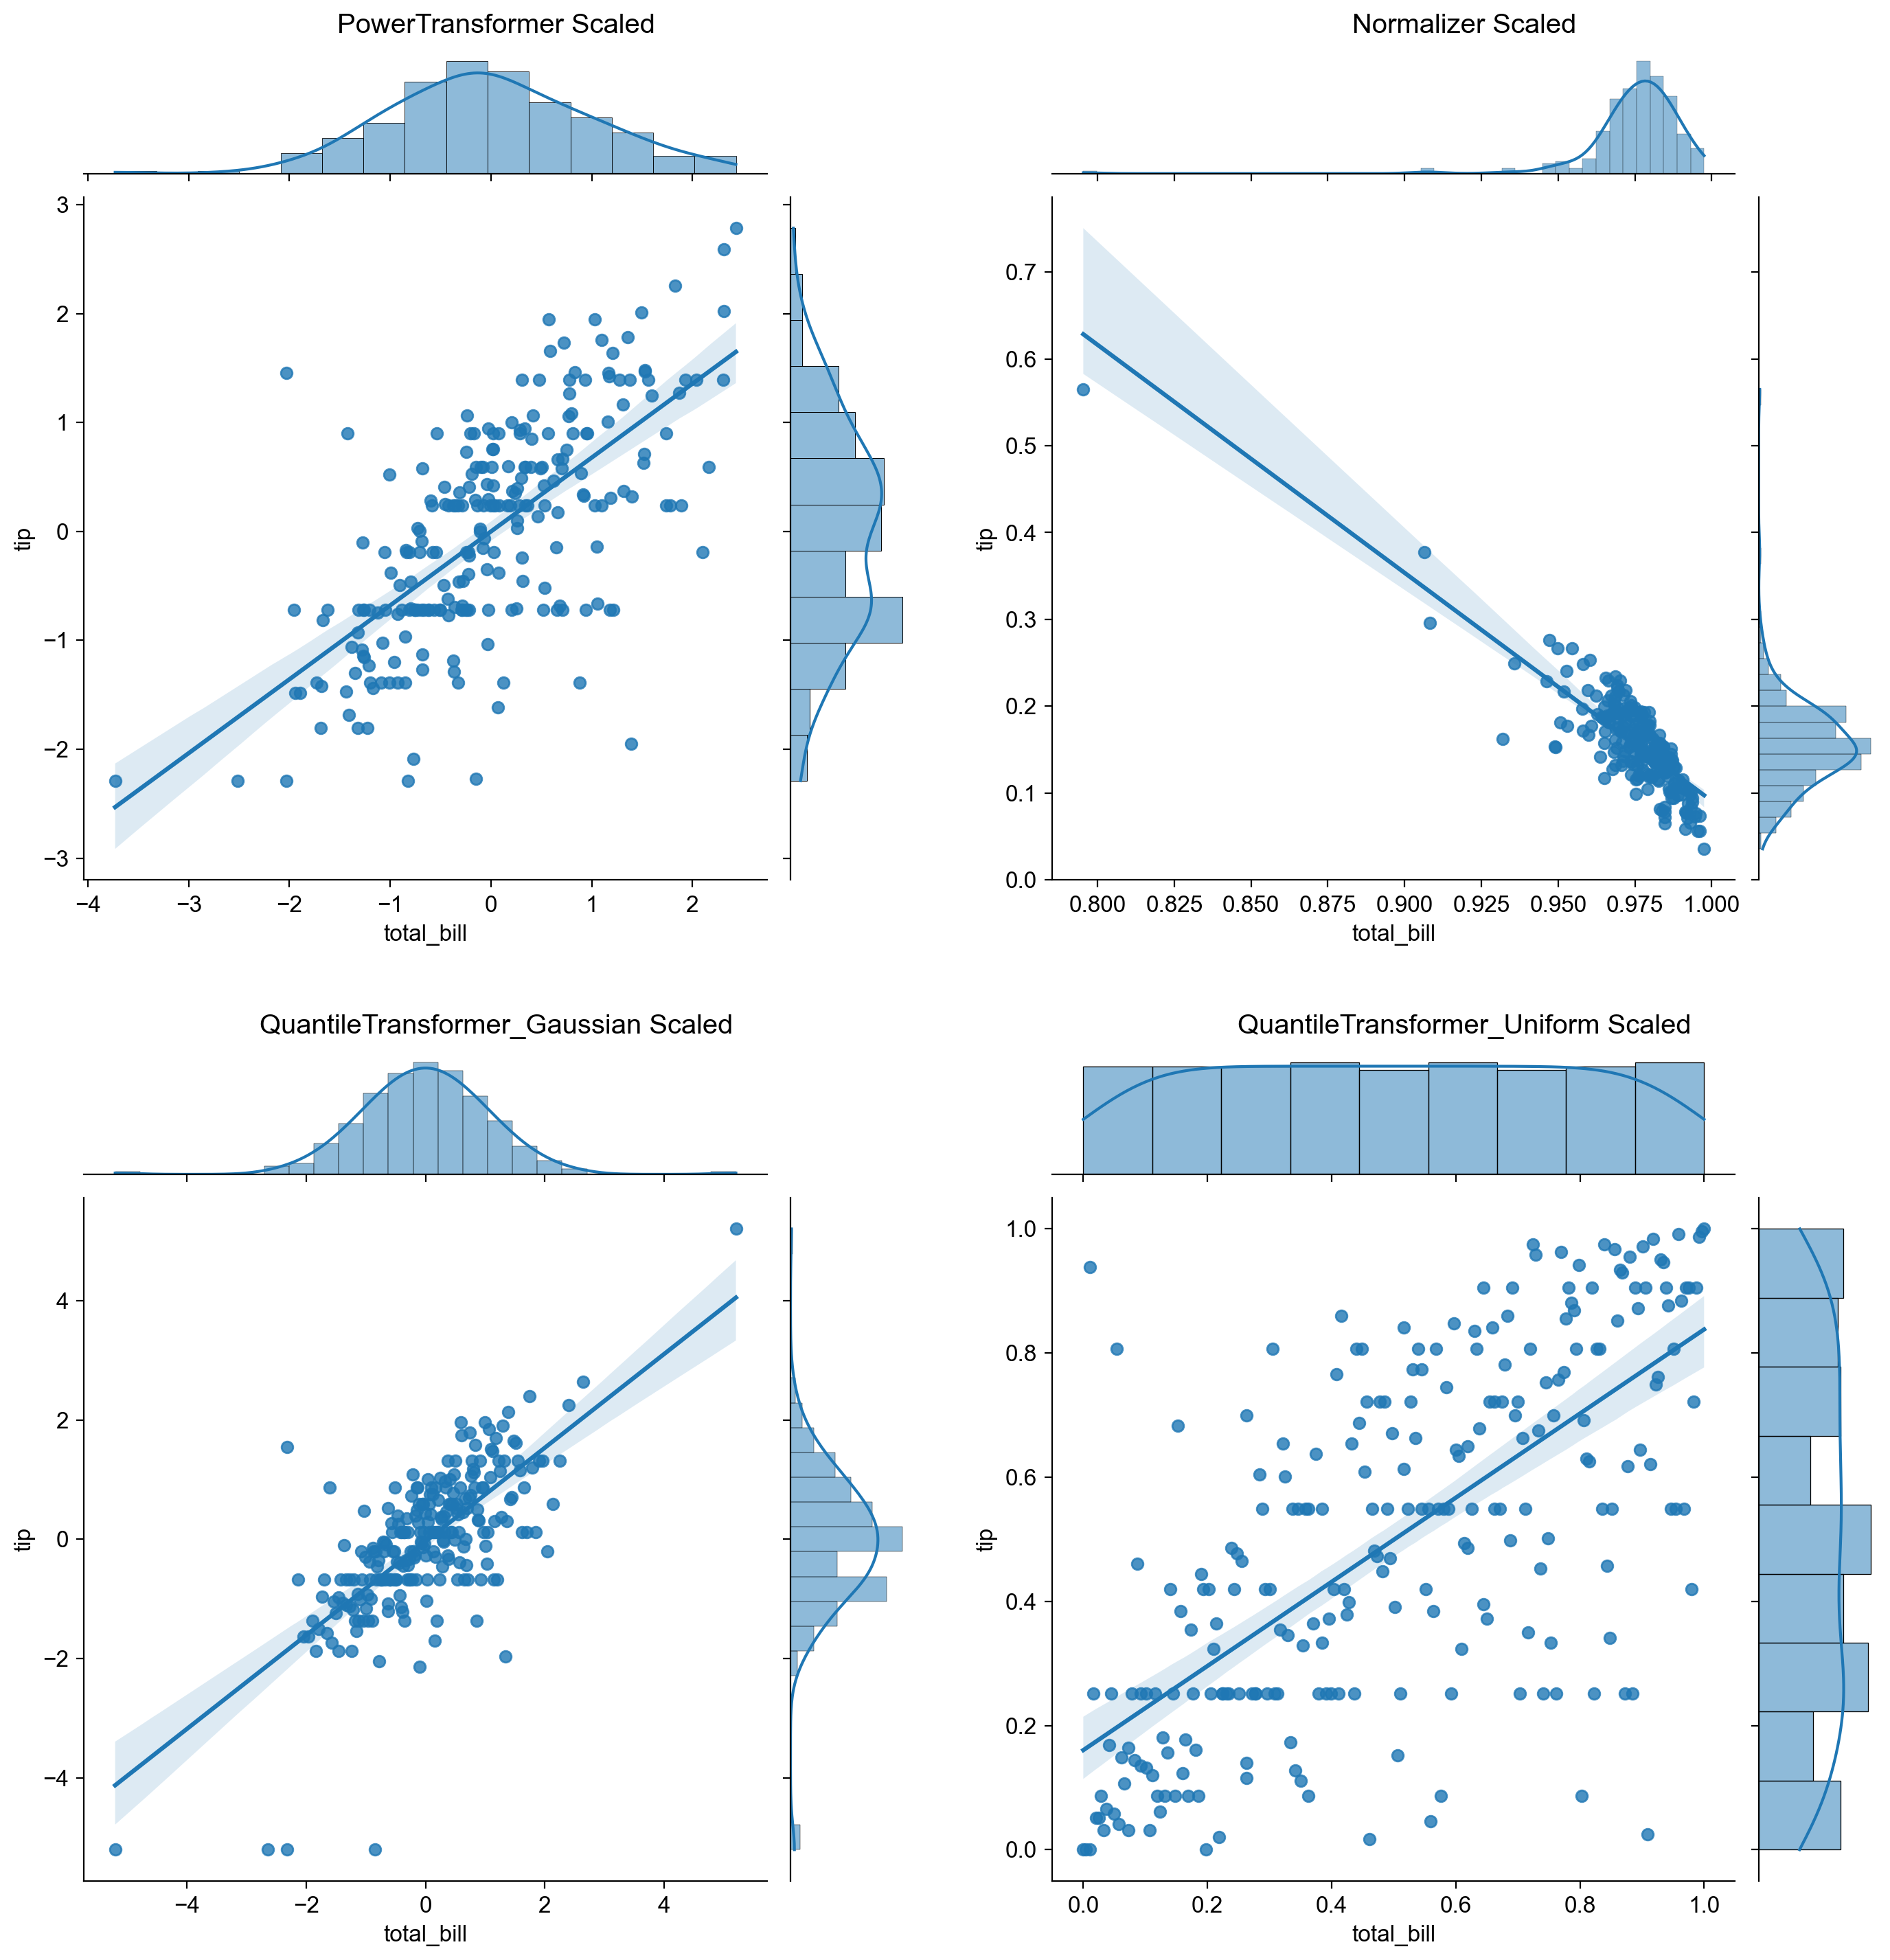

In [20]:
# PowerTransformer
g5 = sns.jointplot(data=tips_power, x='total_bill', y='tip', kind='reg')
g5 = pw.load_seaborngrid(g5)
g5.set_suptitle("PowerTransformer Scaled")

# Normalizer
g6 = sns.jointplot(data=tips_normal, x='total_bill', y='tip', kind='reg')
g6 = pw.load_seaborngrid(g6)
g6.set_suptitle("Normalizer Scaled")

# QuantileTransformer_Gaussian
g7 = sns.jointplot(data=tips_gaussian, x='total_bill', y='tip', kind='reg')
g7 = pw.load_seaborngrid(g7)
g7.set_suptitle("QuantileTransformer_Gaussian Scaled")

# QuantileTransformer_Uniform
g8 = sns.jointplot(data=tips_uniform, x='total_bill', y='tip', kind='reg')
g8 = pw.load_seaborngrid(g8)
g8.set_suptitle("QuantileTransformer_Uniform Scaled")


# 모든 그래프 합치기
(g5|g6)/(g7|g8)

##### [결론]
##### 정규분포: PowerTransformer <<< QuantileTransformer_Gaussian
##### Normalizer: 회귀의 양극단에 몰려있지 않은 것으로 봤을 때 skewed-data에는 적합X..

# -------------------------------------------------

### Encoding
#### ; 변수들의 dtype 변화

In [21]:
import pandas as pd
import seaborn as sns

dia = sns.load_dataset('diamonds')

dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [22]:
dia=dia.iloc[:,:7]
dia.head()

,carat,cut,color,clarity,depth,table,price
0,0.2300,Ideal,E,SI2,61.5000,55.0000,326
1,0.2100,Premium,E,SI1,59.8000,61.0000,326
2,0.2300,Good,E,VS1,56.9000,65.0000,327
3,0.2900,Premium,I,VS2,62.4000,58.0000,334
4,0.3100,Good,J,SI2,63.3000,58.0000,335


In [23]:
col_category=['cut','color','clarity']
for col in col_category:
    print(dia[col].unique(),'\n')

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'] 

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J'] 

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'] 



#### § 범주형 → 이산수치형

In [24]:
#Ordinal encoding: "정수(.0000)형" ; 여러column에 사용가능

from sklearn.preprocessing import OrdinalEncoder
Ordinal_en = OrdinalEncoder()

import copy
dia_oe = copy.deepcopy(dia)

#Ordinal_Encoding하려는 column
col=['color']

# Encoding한 결과 확인
dia_oe[col] = pd.DataFrame(Ordinal_en.fit_transform(dia[col]))
print(Ordinal_en.categories_) #정수가 의미하는 rawdata
dia_oe

[array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)]


,carat,cut,color,clarity,depth,table,price
0,0.2300,Ideal,1.0000,SI2,61.5000,55.0000,326
1,0.2100,Premium,1.0000,SI1,59.8000,61.0000,326
2,0.2300,Good,1.0000,VS1,56.9000,65.0000,327
3,0.2900,Premium,5.0000,VS2,62.4000,58.0000,334
4,0.3100,Good,6.0000,SI2,63.3000,58.0000,335
...,...,...,...,...,...,...,...
53935,0.7200,Ideal,0.0000,SI1,60.8000,57.0000,2757
53936,0.7200,Good,0.0000,SI1,63.1000,55.0000,2757
53937,0.7000,Very Good,0.0000,SI1,62.8000,60.0000,2757
53938,0.8600,Premium,4.0000,SI2,61.0000,58.0000,2757


In [25]:
type(dia_oe.iloc[:,2])

pandas.core.series.Series

In [26]:
Ordinal_en.inverse_transform(dia_oe.iloc[:,2:3])[:5] 
 # Dataframe형으로 input해줘야!!
 # 앞에 5줄만 출력

array([['E'],
       ['E'],
       ['E'],
       ['I'],
       ['J']], dtype=object)

In [27]:
#Label encoding: "정수형" ; 한 개의 column(종속변수)에만 사용가능

from sklearn.preprocessing import LabelEncoder
Label_en = LabelEncoder()

import copy
dia_le = copy.deepcopy(dia)

#Label_Encoding하려는 column
col=['cut']

# Encoding한 결과 확인
dia_le[col] = pd.DataFrame(Label_en.fit_transform(dia[col]))
dia_le

,carat,cut,color,clarity,depth,table,price
0,0.2300,2,E,SI2,61.5000,55.0000,326
1,0.2100,3,E,SI1,59.8000,61.0000,326
2,0.2300,1,E,VS1,56.9000,65.0000,327
3,0.2900,3,I,VS2,62.4000,58.0000,334
4,0.3100,1,J,SI2,63.3000,58.0000,335
...,...,...,...,...,...,...,...
53935,0.7200,2,D,SI1,60.8000,57.0000,2757
53936,0.7200,1,D,SI1,63.1000,55.0000,2757
53937,0.7000,4,D,SI1,62.8000,60.0000,2757
53938,0.8600,3,H,SI2,61.0000,58.0000,2757


In [28]:
#Target encoding: "target의 값에 비례한 수치"
 #; 따로 fit에서 target을 설정해줘야!!

from sklearn.preprocessing import TargetEncoder
Target_en = TargetEncoder(smooth=0, target_type='continuous')
# smooth: 정밀도 / target_type: target_feature_dtype

import copy
dia_te = copy.deepcopy(dia)

#Target_Encoding하려는 column
col=['clarity']
Target_en.fit(dia[col], dia.price)

# Encoding한 결과 확인
dia_te[col] = pd.DataFrame(Target_en.transform(dia[col]))
dia_te

,carat,cut,color,clarity,depth,table,price
0,0.2300,Ideal,E,5063.0286,61.5000,55.0000,326
1,0.2100,Premium,E,3996.0011,59.8000,61.0000,326
2,0.2300,Good,E,3839.4554,56.9000,65.0000,327
3,0.2900,Premium,I,3924.9894,62.4000,58.0000,334
4,0.3100,Good,J,5063.0286,63.3000,58.0000,335
...,...,...,...,...,...,...,...
53935,0.7200,Ideal,D,3996.0011,60.8000,57.0000,2757
53936,0.7200,Good,D,3996.0011,63.1000,55.0000,2757
53937,0.7000,Very Good,D,3996.0011,62.8000,60.0000,2757
53938,0.8600,Premium,H,5063.0286,61.0000,58.0000,2757


#### § 범주형 → 이진형

In [29]:
#OneHot encoding: "0 or 1 _행"
 #; fit: 행렬으로만 input가능, 새로운 column추가

from sklearn.preprocessing import OneHotEncoder 
OneHot_en = OneHotEncoder(sparse=False) #True: '행렬'return / False: 'array'return

import copy
dia_ohe = copy.deepcopy(dia)

#OneHot_Encoding하려는 column
col=['cut']
OneHot_en.fit(dia[col].values) #주의!! "numpy행렬"만 input가능!!
 # 따라서 DataFrame에서 값만 따로 빼서, 값 1개가 차원[] 1개를 가지도록_reshape(-1,1) !

#새로운 column을 추가해야!!
for pre in col:
    dum_col=pre+'_'+ OneHot_en.categories_[0]

# Encoding한 결과 확인
dia_ohe[dum_col]= OneHot_en.transform(dia[col].values)
dia_ohe

,carat,cut,color,clarity,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.2300,Ideal,E,SI2,61.5000,55.0000,326,0.0000,0.0000,1.0000,0.0000,0.0000
1,0.2100,Premium,E,SI1,59.8000,61.0000,326,0.0000,0.0000,0.0000,1.0000,0.0000
2,0.2300,Good,E,VS1,56.9000,65.0000,327,0.0000,1.0000,0.0000,0.0000,0.0000
3,0.2900,Premium,I,VS2,62.4000,58.0000,334,0.0000,0.0000,0.0000,1.0000,0.0000
4,0.3100,Good,J,SI2,63.3000,58.0000,335,0.0000,1.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.7200,Ideal,D,SI1,60.8000,57.0000,2757,0.0000,0.0000,1.0000,0.0000,0.0000
53936,0.7200,Good,D,SI1,63.1000,55.0000,2757,0.0000,1.0000,0.0000,0.0000,0.0000
53937,0.7000,Very Good,D,SI1,62.8000,60.0000,2757,0.0000,0.0000,0.0000,0.0000,1.0000
53938,0.8600,Premium,H,SI2,61.0000,58.0000,2757,0.0000,0.0000,0.0000,1.0000,0.0000


In [30]:
OneHot_en.categories_[0]

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [31]:
dia[col].values 
 #이미 값 1개가 차원[] 1개를 가지고 있음을 확인할 수 있다.

array([['Ideal'],
       ['Premium'],
       ['Good'],
       ...,
       ['Very Good'],
       ['Premium'],
       ['Ideal']], dtype=object)

In [32]:
#Dummy encoding: "0 or 1 _행"
 #; drop_first=True: categories_ 의 첫 번째 류에 대해선 제외시킴

pd.get_dummies(dia, columns=['cut'], drop_first=False)

,carat,color,clarity,depth,table,price,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair
0,0.2300,E,SI2,61.5000,55.0000,326,1,0,0,0,0
1,0.2100,E,SI1,59.8000,61.0000,326,0,1,0,0,0
2,0.2300,E,VS1,56.9000,65.0000,327,0,0,0,1,0
3,0.2900,I,VS2,62.4000,58.0000,334,0,1,0,0,0
4,0.3100,J,SI2,63.3000,58.0000,335,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.7200,D,SI1,60.8000,57.0000,2757,1,0,0,0,0
53936,0.7200,D,SI1,63.1000,55.0000,2757,0,0,0,1,0
53937,0.7000,D,SI1,62.8000,60.0000,2757,0,0,1,0,0
53938,0.8600,H,SI2,61.0000,58.0000,2757,0,1,0,0,0


|OneHot| VS |Dummy|
|---|---|---|
| 1 | 가능한 col 개수 | 多(자동으로 object변수에 적용) |
| 학습데이터와 평가데이터의 범주 수가 다를 때 | 특장점 | 간단 |


In [33]:
# LabelBinarizer: 범주형 → 이진형(0/1가 아닌 값으로도 지정가능; neg/pos_label)
 #; fit을 먼저 하고, 새로운 column추가

from sklearn.preprocessing import LabelBinarizer
Label_bin=LabelBinarizer(sparse_output=False, neg_label=-1, pos_label=1)

import copy
dia_lb = copy.deepcopy(dia)

# encoding 할 feature 지정
col=['cut']

Label_bin.fit(dia[col])

#새로운 column을 추가해야!!
for pre in col:
    dum_col=pre+'_'+ Label_bin.classes_.astype('object')


# Encoding한 결과 확인
dia_lb[dum_col] = Label_bin.fit_transform(dia[col])
dia_lb

,carat,cut,color,clarity,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.2300,Ideal,E,SI2,61.5000,55.0000,326,-1,-1,1,-1,-1
1,0.2100,Premium,E,SI1,59.8000,61.0000,326,-1,-1,-1,1,-1
2,0.2300,Good,E,VS1,56.9000,65.0000,327,-1,1,-1,-1,-1
3,0.2900,Premium,I,VS2,62.4000,58.0000,334,-1,-1,-1,1,-1
4,0.3100,Good,J,SI2,63.3000,58.0000,335,-1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.7200,Ideal,D,SI1,60.8000,57.0000,2757,-1,-1,1,-1,-1
53936,0.7200,Good,D,SI1,63.1000,55.0000,2757,-1,1,-1,-1,-1
53937,0.7000,Very Good,D,SI1,62.8000,60.0000,2757,-1,-1,-1,-1,1
53938,0.8600,Premium,H,SI2,61.0000,58.0000,2757,-1,-1,-1,1,-1


#### § 연속수치형 → 범주형

In [34]:
dia.select_dtypes(exclude='category').describe()

,carat,depth,table,price
count,53940.0000,53940.0000,53940.0000,53940.0000
mean,0.7979,61.7494,57.4572,3932.7997
std,0.4740,1.4326,2.2345,3989.4397
min,0.2000,43.0000,43.0000,326.0000
25%,0.4000,61.0000,56.0000,950.0000
50%,0.7000,61.8000,57.0000,2401.0000
75%,1.0400,62.5000,59.0000,5324.2500
max,5.0100,79.0000,95.0000,18823.0000


In [35]:
# Binarizer: 기준값(threshold) 이상/이하 = "1 / 0"

from sklearn.preprocessing import Binarizer

import copy
dia_bin = copy.deepcopy(dia)

# encoding 할 feature 지정
col=['depth']

# Encoding한 결과 확인
dia_bin[col] = Binarizer(threshold=60).fit_transform(dia[col])
dia_bin # depth: <60 == 0 / >60 == 1

,carat,cut,color,clarity,depth,table,price
0,0.2300,Ideal,E,SI2,1.0000,55.0000,326
1,0.2100,Premium,E,SI1,0.0000,61.0000,326
2,0.2300,Good,E,VS1,0.0000,65.0000,327
3,0.2900,Premium,I,VS2,1.0000,58.0000,334
4,0.3100,Good,J,SI2,1.0000,58.0000,335
...,...,...,...,...,...,...,...
53935,0.7200,Ideal,D,SI1,1.0000,57.0000,2757
53936,0.7200,Good,D,SI1,1.0000,55.0000,2757
53937,0.7000,Very Good,D,SI1,1.0000,60.0000,2757
53938,0.8600,Premium,H,SI2,1.0000,58.0000,2757


In [36]:
Label_bin.classes_.astype('object')

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [37]:
# KBinsDiscretizer: "정수형"; 설정한 구간 개수에 맞춰 알아서

from sklearn.preprocessing import KBinsDiscretizer
K_bin=KBinsDiscretizer(n_bins=10, encode='ordinal')

import copy
dia_kbd = copy.deepcopy(dia)

# encoding 할 feature 지정
col=['price']

# Encoding한 결과 확인
dia_kbd[col] = K_bin.fit_transform(dia[col])
dia_kbd

,carat,cut,color,clarity,depth,table,price
0,0.2300,Ideal,E,SI2,61.5000,55.0000,0.0000
1,0.2100,Premium,E,SI1,59.8000,61.0000,0.0000
2,0.2300,Good,E,VS1,56.9000,65.0000,0.0000
3,0.2900,Premium,I,VS2,62.4000,58.0000,0.0000
4,0.3100,Good,J,SI2,63.3000,58.0000,0.0000
...,...,...,...,...,...,...,...
53935,0.7200,Ideal,D,SI1,60.8000,57.0000,5.0000
53936,0.7200,Good,D,SI1,63.1000,55.0000,5.0000
53937,0.7000,Very Good,D,SI1,62.8000,60.0000,5.0000
53938,0.8600,Premium,H,SI2,61.0000,58.0000,5.0000
